In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pickle

In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/final_cleaned_dataset/cleaned_annex.csv')
df.sample(5)

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
305,Yunnan Shengcai,Flower,0.689,8.0,sale,No
606925,Hfyg Haixian Mushroom (Bunch),Edible Mushroom,1.000,1.5,sale,Yes
204157,Broccoli,Cabbage,0.334,12.0,sale,No
286225,Luosi Pepper,Capsicum,0.602,6.0,sale,No
635427,7 Colour Pepper (2),Capsicum,0.531,25.8,sale,No


In [3]:
df[df['Quantity Sold (kilo)'] > 150]

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)


In [4]:
df['Sale or Return'].value_counts()

Sale or Return
sale      878042
return       461
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Item Name                    878503 non-null  object 
 1   Category Name                878503 non-null  object 
 2   Quantity Sold (kilo)         878503 non-null  float64
 3   Unit Selling Price (RMB/kg)  878503 non-null  float64
 4   Sale or Return               878503 non-null  object 
 5   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), object(4)
memory usage: 40.2+ MB


In [6]:
df['Discount (Yes/No)'].value_counts()

Discount (Yes/No)
No     831137
Yes     47366
Name: count, dtype: int64

In [7]:
scaler = MinMaxScaler()
df.iloc[:,[2, 3]] = scaler.fit_transform(df.iloc[:,[2, 3]])
df.head()

,Item Name,Category Name,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,Paopaojiao (Jingpin),Capsicum,0.242516,0.062604,sale,No
1,Chinese Cabbage,Flower,0.254107,0.025876,sale,No
2,Paopaojiao (Jingpin),Capsicum,0.242848,0.062604,sale,No
3,Shanghaiqing,Flower,0.243155,0.082638,sale,No
4,Caixin,Flower,0.246175,0.065943,sale,No


In [8]:
df['Unit Selling Price (RMB/kg)'].min(), df['Unit Selling Price (RMB/kg)'].max()

(0.0, 1.0)

In [9]:
df['Quantity Sold (kilo)'].min(), df['Quantity Sold (kilo)'].max()

(0.0, 1.0)

In [10]:
df.iloc[:,[2, 3]].corr()

,Quantity Sold (kilo),Unit Selling Price (RMB/kg)
Quantity Sold (kilo),1.000000,-0.413162
Unit Selling Price (RMB/kg),-0.413162,1.000000


In [11]:
df = pd.get_dummies(df)
df.shape

(878503, 254)

In [12]:
df.sample(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes
232882,0.246814,0.065943,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
276972,0.241108,0.082638,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
753630,0.236656,0.149416,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
701493,0.241083,0.149416,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
319917,0.240929,0.049249,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False


In [16]:
k_values_lower = 5
k_values_upper = 14

k_values = range(k_values_lower, k_values_upper)

wcss_values = []

for k in k_values:
    print(f'Training : {k}')
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss_values.append(kmeans.inertia_)
    print(f'Clusters --> \u001B[34m{k}\u001B[39m    WCSS --> \u001B[31m{wcss_values[-1]}\u001B[39m')

Training : 5


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 5    WCSS --> 886009.0077551659
Training : 6


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 6    WCSS --> 812449.6923537735
Training : 7


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 7    WCSS --> 765410.6516004695
Training : 8


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 8    WCSS --> 715538.2564226727
Training : 9


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 9    WCSS --> 704020.4651160446
Training : 10


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 10    WCSS --> 670878.360961041
Training : 11


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 11    WCSS --> 635669.3300951966
Training : 12


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 12    WCSS --> 620898.3653789582
Training : 13


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters --> 13    WCSS --> 593040.9369365929


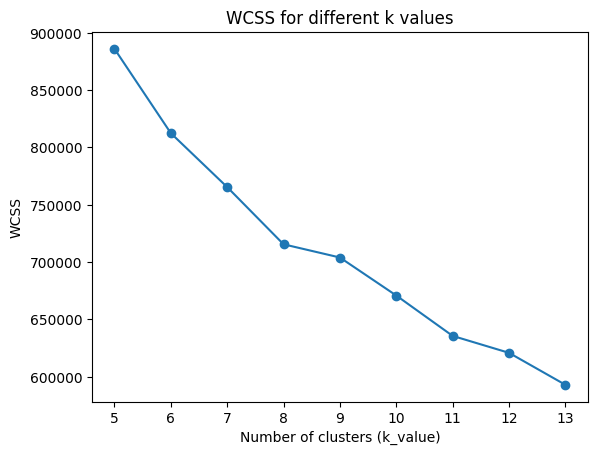

In [17]:
# Plot the results
plt.plot(k_values, wcss_values, marker='o')
plt.title('WCSS for different k values')
plt.xlabel('Number of clusters (k_value)')
plt.ylabel('WCSS')
plt.show()

In [18]:
model = KMeans(n_clusters=8)
pred = model.fit_predict(df)

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
pred

array([4, 6, 4, ..., 3, 2, 0], dtype=int32)

In [20]:
df['Amount'] = df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']

In [21]:
df['cluster'] = pred
df.head(5)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 Colour Pepper (1),Item Name_7 Colour Pepper (2),Item Name_7 Colour Pepper (Bag),Item Name_Agaricus Bisporus (Bag),Item Name_Agaricus Bisporus (Box),Item Name_Aihao,Item Name_Amaranth,Item Name_Amaranth (Bag),...,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower,Category Name_Solanum,Sale or Return_return,Sale or Return_sale,Discount (Yes/No)_No,Discount (Yes/No)_Yes,Amount,cluster
0,0.242516,0.062604,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,0.015183,4
1,0.254107,0.025876,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,0.006575,6
2,0.242848,0.062604,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,0.015203,4
3,0.243155,0.082638,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,0.020094,6
4,0.246175,0.065943,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,0.016234,6


In [22]:
c1 = df[df['cluster'] == 0]
c2 = df[df['cluster'] == 1]
c3 = df[df['cluster'] == 2]
c4 = df[df['cluster'] == 3]
c5 = df[df['cluster'] == 4]
c6 = df[df['cluster'] == 5]
c7 = df[df['cluster'] == 6]
c8 = df[df['cluster'] == 7]

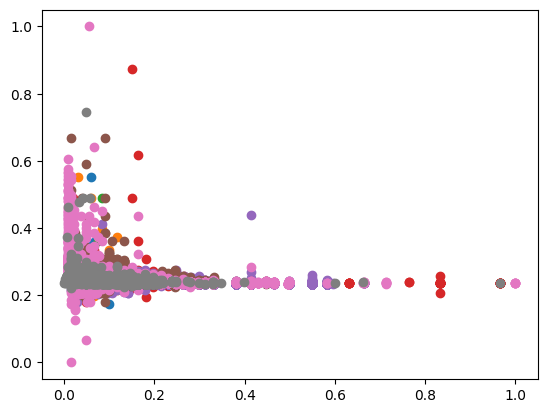

In [23]:
plt.scatter(c1['Unit Selling Price (RMB/kg)'], c1['Quantity Sold (kilo)'])
plt.scatter(c2['Unit Selling Price (RMB/kg)'], c2['Quantity Sold (kilo)'])
plt.scatter(c3['Unit Selling Price (RMB/kg)'], c3['Quantity Sold (kilo)'])
plt.scatter(c4['Unit Selling Price (RMB/kg)'], c4['Quantity Sold (kilo)'])
plt.scatter(c5['Unit Selling Price (RMB/kg)'], c5['Quantity Sold (kilo)'])
plt.scatter(c6['Unit Selling Price (RMB/kg)'], c6['Quantity Sold (kilo)'])
plt.scatter(c7['Unit Selling Price (RMB/kg)'], c7['Quantity Sold (kilo)'])
plt.scatter(c8['Unit Selling Price (RMB/kg)'], c8['Quantity Sold (kilo)'])

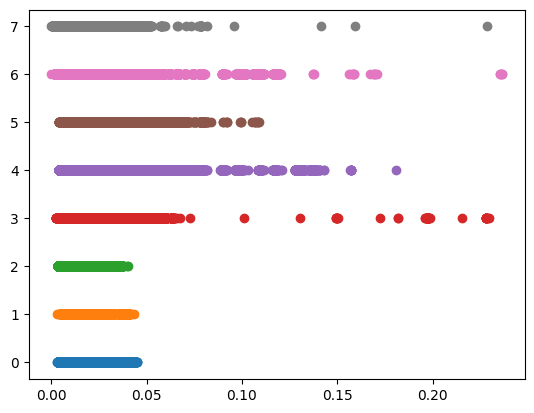

In [24]:
plt.scatter(c1['Amount'], [0] * len(c1['Amount']))
plt.scatter(c2['Amount'], [1] * len(c2['Amount']))
plt.scatter(c3['Amount'], [2] * len(c3['Amount']))
plt.scatter(c4['Amount'], [3] * len(c4['Amount']))
plt.scatter(c5['Amount'], [4] * len(c5['Amount']))
plt.scatter(c6['Amount'], [5] * len(c6['Amount']))
plt.scatter(c7['Amount'], [6] * len(c7['Amount']))
plt.scatter(c8['Amount'], [7] * len(c8['Amount']))

In [25]:
c1.shape[0] , c2.shape[0], c3.shape[0], c4.shape[0], c5.shape[0], c6.shape[0], c7.shape[0], c8.shape[0]

(44741, 84346, 69945, 136728, 131957, 56994, 315286, 38506)

In [26]:
# save model
with open ('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Project-connexa/Rumeth/saved model/model.pickle', 'wb') as file:
    pickle.dump(model, file)